In [1]:
import pandas as pd
import numpy as np
import re
import spacy

In [2]:
allrecipes_raw = pd.read_json('recipes_raw_nosource_ar.json')
epicurious_raw = pd.read_json('recipes_raw_nosource_epi.json')
foodnetwork_raw = pd.read_json('recipes_raw_nosource_fn.json')

In [3]:
allrecipes = allrecipes_raw.copy().T.reset_index().drop(columns = ['index'])
allrecipes

,title,ingredients,instructions,picture_link
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm
...,...,...,...,...
39797,Thai-Indian Veggie Soup,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...",Heat oil in a large pot over medium heat. Add ...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa
39798,Coconut Milk-Free Panang Curry Chicken,"[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...",Heat cream and coconut extract in a skillet or...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa
39799,Cooked Cold Salad,"[3 tablespoons bacon grease ADVERTISEMENT, 2 c...",Heat bacon grease in a skillet over medium-hig...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa
39800,Easy Eggnog Creme Brulee,"[4 egg yolks ADVERTISEMENT, 1 tablespoon white...",Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [4]:
epicurious = epicurious_raw.copy().T.reset_index().drop(columns = ['index'])
epicurious

,ingredients,picture_link,instructions,title
0,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...",None,"Beat the egg whites until stiff, gradually add...",Christmas Eggnog
1,"[18 fresh chestnuts, 2 1/2 pounds veal stew me...",None,Preheat oven to 400°F. Using small sharp knife...,"Veal, Carrot and Chestnut Ragoût"
2,"[2 tablespoons unsalted butter, softened, 4 or...",3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,Preheat the oven to 350°F. Spread the softened...,Caramelized Bread Pudding with Chocolate and C...
3,"[3/4 pound Stilton, crumbled (about 3 cups) an...",None,"In a food processor blend the Stilton, the cre...",Sherried Stilton and Green Peppercorn Spread
4,"[2 cups (about 9 1/2 ounces) whole almonds, to...",None,Position rack in center of oven and preheat to...,Almond-Chocolate Macaroons
...,...,...,...,...
25318,"[5 cups (about) canned beef broth, 1 cup lenti...",None,Bring 4 cups broth and lentils to boil in larg...,Spinach and Lentil Soup
25319,"[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...",16DvpBiksnvbWPCSdZUcPY3oFvgo0py,"Stir together turmeric, 1 1/2 cups water, and ...",Fresh Cheese with Spinach
25320,"[1 medium jalapeño, thinly sliced, 2 garlic cl...",m6IALrfAOr5KDVpqKcvUNpa7VermSIq,"Marinate and cook the steak: Combine jalapeño,...",Jalapeño and Lime–Marinated Skirt Steak Tacos
25321,"[1 1/2 cups almond flour or almond meal, 1/2 c...",wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,Make the cakes: Preheat oven to 350°F. Line th...,Semolina–Lemon Syrup Cakes


In [5]:
foodnetwork = foodnetwork_raw.copy().T.reset_index().drop(columns = ['index'])
foodnetwork

,instructions,ingredients,title,picture_link
0,Toss ingredients lightly and spoon into a butt...,"[1/2 cup celery, finely chopped, 1 small green...",Grammie Hamblet's Deviled Crab,None
1,Watch how to make this recipe.\nSprinkle the s...,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Infineon Raceway Baked Beans,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
2,"In a large saucepan, let the beans soak in eno...","[1 1/2 cups dried black beans, picked over and...",Southwestern Black Bean Dip,None
3,Watch how to make this recipe.\nPreheat the ov...,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Sour Cream Noodle Bake,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
4,Special equipment: sushi mat\nCook the brown r...,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Sushi Renovation,None
...,...,...,...,...
60034,Watch how to make this recipe.\nPreheat a gril...,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Summer Corn Salad,G9XPV1I0nULIbwS76f..0AIq2DsfI3u
60035,Preheat the broiler. Cut the tomatoes in 1/2 c...,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Zucchini Stuffed Tomatoes,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu
60036,Heat the oil and butter in a large skillet ove...,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Pepper Pasta Quick Cook,None
60037,Preheat oven to 350 degrees. On the top half o...,"[8 ounces butter, 8 ounces bittersweet chocola...",Chocolate Cake with Armagnac Ice Cream,None


In [6]:
recipes = pd.concat([allrecipes, epicurious, foodnetwork]).reset_index(drop=True) # Concat does not reset indices
recipes

,title,ingredients,instructions,picture_link
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm
...,...,...,...,...
125159,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...,G9XPV1I0nULIbwS76f..0AIq2DsfI3u
125160,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu
125161,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...,None
125162,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...,None


In [7]:
recipes.isna().sum()

title             569
ingredients       517
instructions      691
picture_link    42571
dtype: int64

In [8]:
null_recs = recipes.copy().drop(columns = 'picture_link').T.isna().any()
null_recs.sum()

691

In [9]:
recipes[null_recs].head()

,title,ingredients,instructions,picture_link
5874,NaN,NaN,NaN,NaN
15020,NaN,NaN,NaN,NaN
15023,NaN,NaN,NaN,NaN
15025,NaN,NaN,NaN,NaN
15637,NaN,NaN,NaN,NaN


In [10]:
rows_to_drop = recipes[null_recs].index
recipes = recipes.drop(index = rows_to_drop).reset_index(drop = True)
recipes.shape

(124473, 4)

In [11]:
import string
nc_ingred_index = [index for i, index in zip(recipes['ingredients'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_title_index = [index for i, index in zip(recipes['title'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_instr_index = [index for i, index in zip(recipes['instructions'], recipes.index) if all(j.isdigit() or j in string.punctuation for j in i)]

In [12]:
index_list = [nc_ingred_index, nc_title_index, nc_instr_index]
[len(x) for x in index_list]

[1520, 0, 39]

In [13]:
from functools import reduce
from operator import add
inds_to_drop = set(reduce(add, index_list))
print(len(inds_to_drop))
recipes = recipes.drop(index=inds_to_drop).reset_index(drop=True)
recipes.shape

1551


(122922, 4)

In [14]:
# Recipe instructions with less than 20 characters are not good recipes
empty_instr_ind = [index for i, index in zip(recipes['instructions'], recipes.index) if len(i) < 20]
recipes = recipes.drop(index = empty_instr_ind).reset_index(drop=True)

In [15]:
recipes.isna().sum()

title               0
ingredients         0
instructions        0
picture_link    41687
dtype: int64

In [16]:
# Removing ADVERTISEMENT text from ingredients list
ingredients = []
for ing_list in recipes['ingredients']:
    clean_ings = [ing.replace('ADVERTISEMENT','').strip() for ing in ing_list]
    if '' in clean_ings:
        clean_ings.remove('')
    ingredients.append(clean_ings)
recipes['ingredients'] = ingredients

In [17]:
recipes.loc[0,'ingredients']

['4 skinless, boneless chicken breast halves',
 '2 tablespoons butter',
 '2 (10.75 ounce) cans condensed cream of chicken soup',
 '1 onion, finely diced',
 '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces']

In [18]:
# Extracting ingredients from their lists and formatting as single strings
recipes['ingredient_text'] = ['; '.join(ingredients) for ingredients in recipes['ingredients']]
recipes['ingredient_text'].head()

0    4 skinless, boneless chicken breast halves; 2 ...
1    2 (10.75 ounce) cans condensed cream of mushro...
2    1/2 cup packed brown sugar; 1/2 cup ketchup; 1...
3    1 cup butter, softened; 1 cup white sugar; 1 c...
4    8 ounces whole wheat rotini pasta; 3 cups fres...
Name: ingredient_text, dtype: object

In [19]:
# Counting the number of ingredients used in each recipe
recipes['ingredient_count'] = [len(ingredients) for ingredients in recipes['ingredients']]

In [20]:
all_text = recipes['title'] + ' ' + recipes['ingredient_text'] + ' ' + recipes['instructions']
all_text[0]

'Slow Cooker Chicken and Dumplings 4 skinless, boneless chicken breast halves; 2 tablespoons butter; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n'

In [21]:
# Clean_text Function
import string
import re

def clean_text(documents):
    cleaned_text = []
    for doc in documents:
        doc = doc.translate(str.maketrans('', '', string.punctuation)) # Remove Punctuation
        doc = re.sub(r'\d+', '', doc) # Remove Digits
        doc = doc.replace('\n',' ') # Remove New Lines
        doc = doc.strip() # Remove Leading White Space
        doc = re.sub(' +', ' ', doc) # Remove multiple white spaces
        cleaned_text.append(doc)
    return cleaned_text

# Cleaning Text
cleaned_text = clean_text(all_text)

In [22]:
cleaned_text[2]

'Brown Sugar Meatloaf cup packed brown sugar cup ketchup pounds lean ground beef cup milk eggs teaspoons salt teaspoon ground black pepper small onion chopped teaspoon ground ginger cup finely crushed saltine cracker crumbs Preheat oven to degrees F degrees C Lightly grease a x inch loaf pan Press the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar In a mixing bowl mix thoroughly all remaining ingredients and shape into a loaf Place on top of the ketchup Bake in preheated oven for hour or until juices are clear'

In [23]:
# Testing Strategies and Code
nlp = spacy.load('en_core_web_sm')
' '.join([token.lemma_ for token in nlp(cleaned_text[2]) if not token.is_stop])

c:\Users\areas\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:895: UserWarning: [W094] Model 'en_core_web_sm' (3.0.0) specifies an under-constrained spaCy version requirement: >=2.2.0. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.5.2,<3.6.0
  warnings.warn(warn_msg)


'Brown Sugar Meatloaf cup pack brown sugar cup ketchup pound lean ground beef cup milk egg teaspoon salt teaspoon grind black pepper small onion chop teaspoon ground ginger cup finely crush saltine cracker crumb preheat oven degree F degree C Lightly grease x inch loaf pan Press brown sugar prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remain ingredient shape loaf Place ketchup Bake preheated oven hour juice clear'

In [24]:
# Tokenizing Function that lemmatizes words and removes Stop Words
def text_tokenizer(documents):
    tokenized_documents = []
    for doc in documents:
        tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
        tokenized_documents.append(tok_doc)
    return tokenized_documents

In [25]:
# Tokenizing Function to run in parallel
def text_tokenizer_mp(doc):
    tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
    return tok_doc

In [26]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [27]:
import nltk
nltk.download('punkt')

# define the tokenizer function using word_tokenize
def text_tokenizer(doc):
    tokens = nltk.word_tokenize(doc)
    return tokens

# tokenize the cleaned_text using the text_tokenizer function
tokenized_text = [text_tokenizer(doc) for doc in cleaned_text]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\areas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# Save the tokenized_text variable as a csv in order to return to it;
# Do not attempt to run the parser above, it will simply take too long
# Reload the csv from file insted
pd.Series(tokenized_text).to_csv('tokenized_text.csv')

In [29]:
tokenized_text[0]

['Slow',
 'Cooker',
 'Chicken',
 'and',
 'Dumplings',
 'skinless',
 'boneless',
 'chicken',
 'breast',
 'halves',
 'tablespoons',
 'butter',
 'ounce',
 'cans',
 'condensed',
 'cream',
 'of',
 'chicken',
 'soup',
 'onion',
 'finely',
 'diced',
 'ounce',
 'packages',
 'refrigerated',
 'biscuit',
 'dough',
 'torn',
 'into',
 'pieces',
 'Place',
 'the',
 'chicken',
 'butter',
 'soup',
 'and',
 'onion',
 'in',
 'a',
 'slow',
 'cooker',
 'and',
 'fill',
 'with',
 'enough',
 'water',
 'to',
 'cover',
 'Cover',
 'and',
 'cook',
 'for',
 'to',
 'hours',
 'on',
 'High',
 'About',
 'minutes',
 'before',
 'serving',
 'place',
 'the',
 'torn',
 'biscuit',
 'dough',
 'in',
 'the',
 'slow',
 'cooker',
 'Cook',
 'until',
 'the',
 'dough',
 'is',
 'no',
 'longer',
 'raw',
 'in',
 'the',
 'center']

## WORD EMBEDDING

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the tokenized text using the TfidfVectorizer
text_tfidf = tfidf_vectorizer.fit_transform([" ".join(tokens) for tokens in tokenized_text])

# get the feature names from the TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# print the shape of the TF-IDF matrix and the first 10 feature names
print("TF-IDF matrix shape:", text_tfidf.shape)
print("First 10 feature names:", feature_names[:10])


TF-IDF matrix shape: (122911, 52304)
First 10 feature names: ['aa' 'aaah' 'aaahh' 'aacorn' 'aaku' 'aalborg' 'aale' 'aaron' 'aarons'
 'aarsis']


In [31]:
text_tfidf

<122911x52304 sparse matrix of type '<class 'numpy.float64'>'
	with 11938334 stored elements in Compressed Sparse Row format>

In [32]:
print(len(feature_names))

52304


## Topic Modelling

In [33]:
from sklearn.decomposition import LatentDirichletAllocation

# create an instance of LatentDirichletAllocation with 50 topics
lda = LatentDirichletAllocation(n_components=50, random_state=42)

# fit the TF-IDF matrix to the LDA model
text_lda = lda.fit_transform(text_tfidf)

# get the top 10 words for each topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]  
    top_words_per_topic.append(top_words)

# print the top 10 words for each topic
for i, topic_words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {' '.join(topic_words)}")

Topic 0: figs fig manhattan tartare mission benedictine drumettes diamond hors doeuvres
Topic 1: the and to shrimp add oil pepper with heat garlic
Topic 2: vitamin luncheon spam truvia elk source zaatar excellent sweetener pumpkins
Topic 3: potatoes the and to potato with in salt pepper sweet
Topic 4: clams mussels oysters clam open oyster persimmon scrubbed shells shucked
Topic 5: and the salad pepper vinegar dressing salt oil cup to
Topic 6: waffle iron waffles okra manicotti gum xanthan manufacturers according instructions
Topic 7: spaetzle curacao jackfruit olivada chililime sarahs babas zippy unbroken firecracker
Topic 8: campari baileys juicer absinthe sweetbreads samosas slush halffilled frico eggless
Topic 9: eggnog stevia butterfinger pimentón mimosa vera pct buckle farina tiendacom
Topic 10: cheese and the pasta to in cup until pepper ounce
Topic 11: chicken the and to in sauce pepper degrees pork chops
Topic 12: and the to soup heat rice chicken onion broth pepper
Topic 13: 

In [34]:
from sklearn.decomposition import NMF

# create an instance of NMF with 50 components
nmf = NMF(n_components=50, init='random', random_state=42)

# fit the TF-IDF matrix to the NMF model
text_nmf = nmf.fit_transform(text_tfidf)

# get the top 10 words for each component
top_words_per_component = []
for component_idx, component in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in component.argsort()[:-11:-1]]
    top_words_per_component.append(top_words)

# print the top 10 words for each component
for i, component_words in enumerate(top_words_per_component):
    print(f"Component {i}: {' '.join(component_words)}")


c:\Users\areas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Component 0: and to add stock water pot simmer boil bring bay
Component 1: chicken breast breasts skinless boneless broth halves cooked pieces juices
Component 2: and pepper salt with oil olive season freshly black taste
Component 3: oven degrees baking dish bake preheat preheated to minutes sheet
Component 4: to of ahead with and be in at temperature transfer
Component 5: egg whites yolks beat mixture peaks fold in yolk whisk
Component 6: cookies cookie sheets baking vanilla beat sugar extract on soda
Component 7: corn kernels syrup ears cob tortillas ounce kernel cornmeal cobs
Component 8: the of and it for to them you on make
Component 9: flour baking eggs soda batter cup powder cups allpurpose in
Component 10: tomatoes garlic basil olive oil tomato chopped parsley fresh oregano
Component 11: soup broth onion ounce celery can condensed carrots chopped simmer
Component 12: grill steak steaks side on marinade for grilled minutes to
Component 13: pork chops loin roast tenderloin meat c

In [35]:
text_lda.shape

(122911, 50)

## Exploring Topics by Document

In [36]:
text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  text_series[index], '\n\n')

In [37]:
docs_by_tops(text_lda,(0,3),(0,3))

Topic #0 
Document #0 
Topic Score: 0.377389851740317

 Cavaniola's Cheese Platter Goat's milk cheese, such as Monte Enebro; Sheep's milk cheese, such as Abbaye de Belloc; Cow's milk cheese, such as Brillat-Savarin; Cheddar, such as Neal¿s Yard Dairy Montgomery Cheddar; Nut and fruit crackers; Dried figs; Dried cranberries; Sprigs of rosemary, for decoration; Fig leaves, for decoration Artfully arrange the cheeses, crackers, figs and cranberries on a board and decorate with the rosemary and fig leaves. 


Topic #0 
Document #1 
Topic Score: 0.31575174365799924

 Pearl of Puebla  2 oz. Sombra Mezcal; .75 oz. Yellow Chartreuse; .75 oz. Lime Juice; 4 sprigs Fresh Oregano; 1 barspoon Ricard Pastis; 1 barspoon Agave Nectar Muddle the oregano and agave nectar Add everything else, then shake with ice and fine-strain into a chilled coupe No garnish
Muddle the oregano and agave nectar
Add everything else, then shake with ice and fine-strain into a chilled coupe
No garnish 


Topic #0 
Document 

In [38]:
docs_by_tops(text_nmf,(0,3),(0,3))

Topic #0 
Document #0 
Topic Score: 0.08215944409226876

 Turkey Stock  2 tablespoons vegetable oil; 1 large onion, chopped; 1 large carrot, chopped; 1 celery stalk with leaves, chopped; 1 carcass with skin from one 12- to 15-pound turkey; meat removed and reserved, carcass broken into pieces; 4 quarts (about) cold water; 4 fresh Italian parsley sprigs; 1/2 teaspoon dried thyme; 1/4 teaspoon whole black peppercorns; 1 bay leaf Heat oil in large pot over medium heat. Add onion, carrot, and celery. Cover; cook until vegetables begin to soften, stirring occasionally, about 5 minutes. Place turkey carcass pieces in pot and add enough cold water to cover bones (about 4 quarts). Bring mixture to boil and skim any foam from the surface. Add parsley, thyme, peppercorns, and bay leaf. Reduce heat to low, cover with lid slightly ajar, and simmer 3 hours. Strain stock into large bowl, pressing on solids in strainer; discard solids. Let stock stand 10 minutes; skim off fat. Boil to reduce to 10 cu

In [39]:
docs_by_tops(text_nmf,(1,2),(90000,90001))

Topic #1 
Document #90000 
Topic Score: 0.0

 Vinegar Based BBQ Sauce 1 cup cider vinegar; 1 tablespoon salt; 1/2 teaspoon cayenne pepper; 1 teaspoon crushed red pepper flakes; 1 tablespoon brown sugar In a small bowl, combine the vinegar, salt, cayenne pepper, crushed red pepper flakes and brown sugar. Mix well and allow ingredients to mesh for about 4 to 8 hours before using.
 




In [40]:
text_tfidf

<122911x52304 sparse matrix of type '<class 'numpy.float64'>'
	with 11938334 stored elements in Compressed Sparse Row format>

## Exploring Topics by words

In [41]:
word_series = pd.Series(feature_names)

def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
    topic_word_scores = tfidf_mat.T * top_mat
    for i in range(topic_range[0],topic_range[1]):
        word_scores = pd.Series(topic_word_scores[:,i])
        word_index = word_scores.sort_values(ascending = False)[:n_words].index
        print('\nTopic #{}'.format(i))
        for index in word_index:
            print(word_series[index],'\t\t', word_scores[index])

In [42]:
words_by_tops(text_tfidf, text_lda, (0,3), 10)


Topic #0
the 		 54.44045388932147
and 		 45.500826285657475
to 		 26.28183699846035
in 		 22.080846851710902
with 		 17.995023558449592
cup 		 16.603089079344272
until 		 15.111944299626145
of 		 13.834058432376331
salt 		 12.518896288390774
sugar 		 12.35291589159275

Topic #1
the 		 1358.6526899084065
and 		 1054.259648480241
to 		 569.5978049783492
add 		 417.75077295368436
pepper 		 362.0801745678688
oil 		 359.06559485799045
with 		 349.96187991190453
shrimp 		 343.2850172250286
in 		 338.8634574423617
heat 		 325.8158106967106

Topic #2
the 		 53.43337122903675
and 		 44.316255283384045
to 		 25.56113071565084
in 		 21.399211599207447
with 		 17.522659520100348
cup 		 16.801591979200644
until 		 14.955006078590596
of 		 14.01124791200314
salt 		 12.385038496791692
pepper 		 12.340623715225174


In [43]:
# Words using NMF
words_by_tops(text_tfidf, text_nmf, (0,3), 10)


Topic #0
the 		 151.28390587789903
and 		 141.39168827419158
to 		 87.09676601532006
in 		 51.165395539053065
add 		 48.969413580944526
heat 		 44.40717961881249
with 		 42.25607606737812
minutes 		 38.76965715557278
until 		 38.2424616116649
water 		 37.285139774689206

Topic #1
chicken 		 247.40115534753522
the 		 160.96732190335823
and 		 141.21933831702154
to 		 82.02499284123157
in 		 60.756908047509036
pepper 		 50.58231898535551
with 		 49.717981041476015
heat 		 46.03518865147627
oil 		 44.378185207832104
minutes 		 44.27481549588628

Topic #2
the 		 274.75702616234
and 		 267.99631909560907
to 		 137.79341366739916
pepper 		 118.05056363871198
with 		 111.497487331976
oil 		 103.38371487972903
salt 		 96.61422727189061
in 		 95.33979661595245
olive 		 71.0829469201892
until 		 68.97784850123989


## Keyword Extraction of Topics Using TextRank

In [44]:
text_index = pd.Series(text_nmf[:,1]).sort_values(ascending = False)[:100].index
text_4summary = pd.Series(cleaned_text)[text_index]

# Manually Creating a list of recipe stop
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','tablespoon','oven']

In [45]:
# generating topic filter
import time
start_time = time.time()

parsed_texts = nlp(' '.join(text_4summary)) 
kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and str(word) not in recipe_stopwords])

print('Execution Time: {} seconds', time.time() - start_time)

Execution Time: {} seconds 2.4395060539245605


In [46]:
kw_filts = set(list(kw_filts))

In [47]:
parsed_texts = list(set(parsed_texts))

In [48]:
# Print unique values of parsed_texts and kw_filts
print(set(parsed_texts))
print(set(list(kw_filts)))


{can, over, pinch, breasts, cooked, Add, the, cloves, Chicken, degrees, and, dish, Salad, garlic, to, skillet, pound, thickens, and, cold, to, cook, side, to, with, flour, Continue, cayenne, Turn, minute, until, no, more, and, in, chicken, boneless, about, rice, chicken, and, and, to, in, herb, chicken, cloves, or, C, ounce, tossing, of, chicken, Turn, simmer, heat, Clean, minutes, broth, minutes, to, sauce, a, Brown, chicken, with, minutes, to, through, Transfer, black, over, with, with, clear, until, Add, to, pieces, cooking, around, thyme, the, Lemon, green, Paprika, Preheat, a, Season, pepper, halves, pound, over, in, pot, olive, to, fresh, oven, chicken, vinegar, before, stir, pepper, thickened, to, preheated, tablespoons, Melt, butter, with, pie, the, olives, and, chicken, baking, Cover, stirring, Italianstyle, drumsticks, is, cook, salt, white, Drain, season, into, oil, bottom, Pour, paprika, into, shallots, heat, thinly, oil, to, paprika, minutes, chicken, chicken, grated, on, 

In [49]:
# Creating adjecency Table for recipes.
adjacency = pd.DataFrame(columns=list(kw_filts), index=list(kw_filts), data = 0)
for i, word in enumerate(parsed_texts):
    if any ([str(word) == item for item in kw_filts]):
        end = min(len(parsed_texts), i+5) # Window of four words
        nextwords = parsed_texts[i+1:end]
        inset = [str(x) in kw_filts for x in nextwords]
        neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
        if neighbors:
            for i in neighbors:
                adjacency.loc[str(word), i] += 1

In [50]:
adjacency

,wrap,parsley,directions,Beat,bacon,rack,°,bones,lemon,lengthwise,...,tie,firm,melt,solids,recipe,tender,brown,buttermilk,mix,marmalade
wrap,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
parsley,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
directions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bacon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tender,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brown,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,3,0,1,0
buttermilk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
!pip install networkx

In [52]:
import networkx as nx

# Running TextRank
nx_words = nx.from_numpy_array(adjacency.values)
ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)

# Identifying the most highly ranked keywords
ranked = sorted(((ranks[i],s) for i,s in enumerate(kw_filts)),
                reverse=True)

In [53]:
ranked[:25]

[(0.08180590773385513, 'chicken'),
 (0.024036664441326135, 'minutes'),
 (0.017663229836982507, 'skillet'),
 (0.017296227890273908, 'heat'),
 (0.016463095505276994, 'pepper'),
 (0.014697603972171711, 'salt'),
 (0.014635140290487684, 'oil'),
 (0.012594117301642251, 'sauce'),
 (0.012106988829211983, 'tablespoons'),
 (0.012035005299168148, 'broth'),
 (0.011882993159623127, 'garlic'),
 (0.009693813516087458, 'breast'),
 (0.00962519125535314, 'flour'),
 (0.00935558289490564, 'side'),
 (0.00918778255326203, 'pan'),
 (0.008212429154294754, 'Place'),
 (0.008020345922741498, 'breasts'),
 (0.007942661838879966, 'boneless'),
 (0.007767465012212368, 'pieces'),
 (0.007765431739737365, 'F'),
 (0.007724840447425218, 'Transfer'),
 (0.007491395548209452, 'wine'),
 (0.007453417996783733, 'degrees'),
 (0.007406080143056859, 'bowl'),
 (0.007137158319567127, 'mixture')]

In [54]:
# checking to see there are actual values loaded in the adjacency df
import scipy
scipy.sparse.csr_matrix(adjacency.copy().values)

<505x505 sparse matrix of type '<class 'numpy.int64'>'
	with 9285 stored elements in Compressed Sparse Row format>

In [55]:
pd.Series(list(kw_filts)).nunique()

505

## Analyzing Score distribution of document and word ranks within Topics

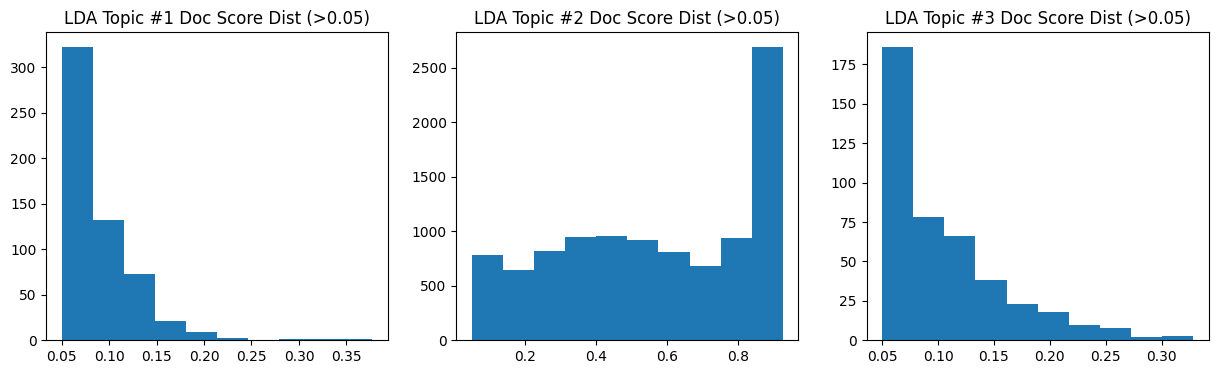

In [56]:
import matplotlib.pyplot as plt
# text_lda
# text_nmf
# ranked
# LDA Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.05])
    plt.title('LDA Topic #{} Doc Score Dist (>0.05)'.format(i+1))
plt.show()

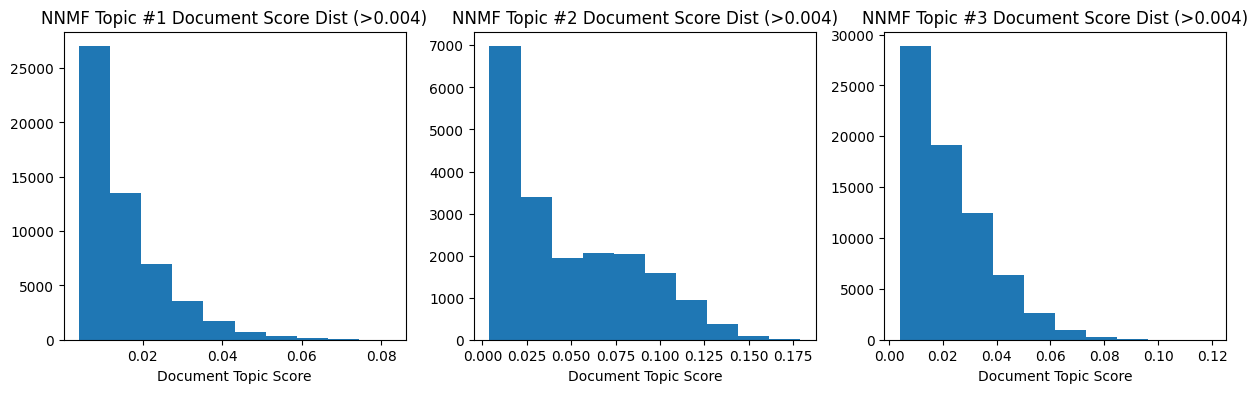

In [57]:
# NNMF Topic documents for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i])
    plt.subplot(1,3,i+1)
    plt.hist(series[series > 0.004])
    plt.title('NNMF Topic #{} Document Score Dist (>0.004)'.format(i+1))
    plt.xlabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Distributions.png', transparent = True)
plt.show()

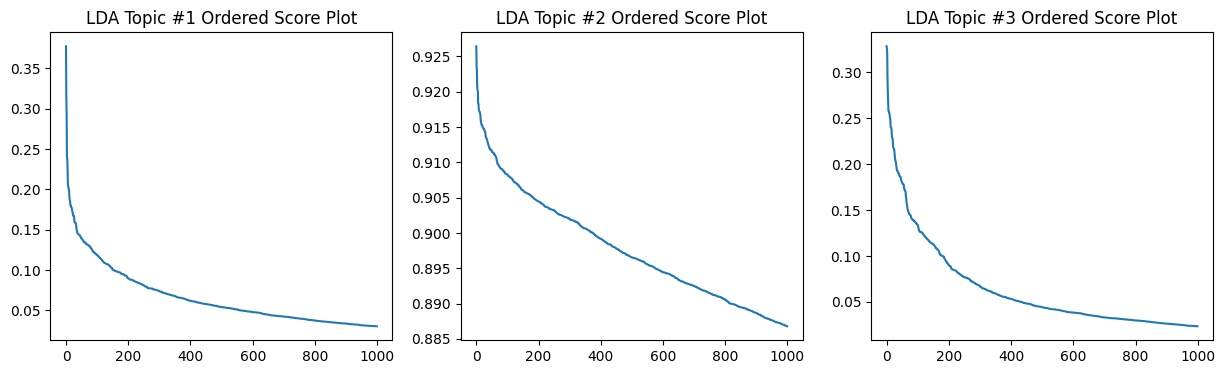

In [58]:
# LDA Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_lda[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('LDA Topic #{} Ordered Score Plot'.format(i+1))
plt.show()

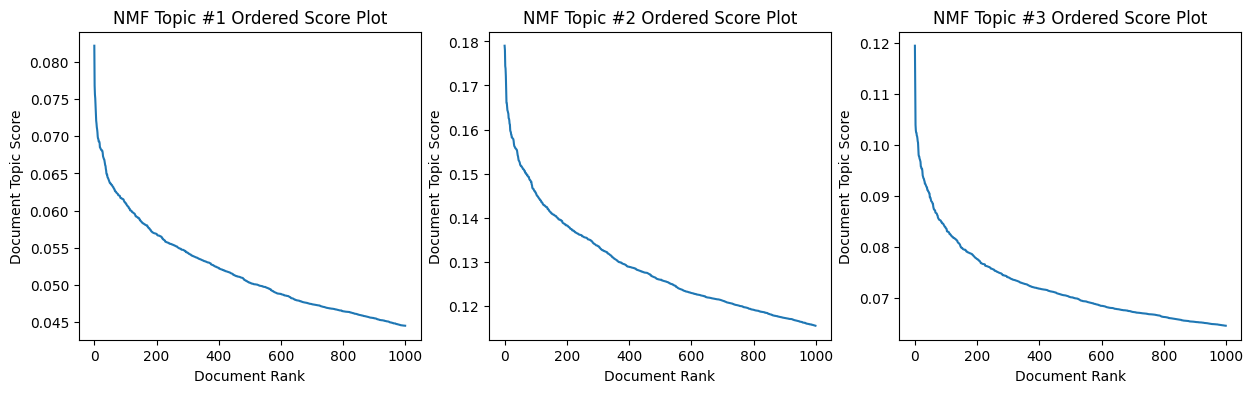

In [59]:
# NMF Topic document scores for topics 0-2
plt.figure(figsize=(15,4))
for i in range(3):
    series = pd.Series(text_nmf[:,i]).copy().sort_values(ascending = False).reset_index(drop = True)
    plt.subplot(1,3,i+1)
    plt.plot(series[:1000])
    plt.title('NMF Topic #{} Ordered Score Plot'.format(i+1))
    plt.xlabel('Document Rank')
    plt.ylabel('Document Topic Score')
#plt.savefig('DocsByTop_Score_Elbows.png', transparent = True)
plt.show()

In [60]:
# Set All Recommendation Model Parameters
N_topics = 50             # Number of Topics to Extract from corpora
N_top_docs = 200          # Number of top documents within each topic to extract keywords
N_top_words = 25          # Number of keywords to extract from each topic
N_docs_categorized = 2000 # Number of top documents within each topic to tag 
N_neighbor_window = 4     # Length of word-radius that defines the neighborhood for
                          # each word in the TextRank adjacency table

# Query Similarity Weights
w_title = 0.2
w_text = 0.3
w_categories = 0.5
w_array = np.array([w_title, w_text, w_categories])

# Recipe Stopwords: for any high volume food recipe terminology that doesn't contribute
# to the searchability of a recipe. This list must be manually created.
recipe_stopwords = ['cup','cups','ingredient','ingredients','teaspoon','teaspoons','tablespoon',
                   'tablespoons','C','F']

In [61]:
# Renaming Data Dependencies
topic_transformed_matrix = text_nmf
root_text_data = cleaned_text

## Generating tags (keywords/categories) and assigning to corresponding documents

In [62]:
adjacency = adjacency[~adjacency.index.duplicated(keep='first')]

In [63]:
from itertools import repeat

#recipes['tag_list'] = [[] for i in repeat(None, recipes.shape[0])]

def topic_docs_4kwsummary(topic_document_scores, root_text_data):
    '''Gathers and formats the top recipes in each topic'''
    text_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_top_docs].index
    text_4kwsummary = pd.Series(root_text_data)[text_index]
    return text_4kwsummary

def generate_filter_kws(text_list):
    '''Filters out specific parts of speech and stop words from the list of potential keywords'''
    parsed_texts = nlp(' '.join(text_list)) 
    kw_filts = set([str(word) for word in parsed_texts 
                if (word.pos_== ('NOUN' or 'ADJ' or 'VERB'))
                and word.lemma_ not in recipe_stopwords])
    return list(kw_filts), parsed_texts

def generate_adjacency(kw_filts, parsed_texts):
    '''Tabulates counts of neighbors in the neighborhood window for each unique word'''
    adjacency = pd.DataFrame(columns=kw_filts, index=kw_filts, data = 0)
    for i, word in enumerate(parsed_texts):
        if any ([str(word) == item for item in kw_filts]):
            end = min(len(parsed_texts), i+N_neighbor_window+1) # Neighborhood Window Utilized Here
            nextwords = parsed_texts[i+1:end]
            inset = [str(x) in kw_filts for x in nextwords]
            neighbors = [str(nextwords[i]) for i in range(len(nextwords)) if inset[i]]
            if neighbors:
                for i in neighbors:
                    adjacency.loc[str(word), i] += 1
    return adjacency
                
def generate_wordranks(adjacency):
    '''Runs TextRank on adjacency table'''
    nx_words = nx.from_numpy_array(adjacency.values)
    ranks=nx.pagerank(nx_words, alpha=.85, tol=.00000001)
    return ranks

def generate_tag_list(ranks):
    '''Uses TextRank ranks to return actual key words for each topic in rank order'''
    rank_values = [i for i in ranks.values()]
    ranked = pd.DataFrame(zip(rank_values, list(kw_filts))).sort_values(by=0,axis=0,ascending=False)
    kw_list = ranked.iloc[:N_top_words,1].to_list()
    return kw_list

# Master Function utilizing all above functions
def generate_tags(topic_document_scores, root_text_data):
    text_4kwsummary = topic_docs_4kwsummary(topic_document_scores, root_text_data)
    kw_filts, parsed_texts = generate_filter_kws(text_4kwsummary)
    adjacency = generate_adjacency(kw_filts, parsed_texts)
    ranks = generate_wordranks(adjacency)
    kw_list = generate_tag_list(ranks)
    return kw_list

def generate_kw_index(topic_document_scores):
    kw_index = pd.Series(topic_document_scores).sort_values(ascending = False)[:N_docs_categorized].index
    return kw_index


In [64]:
# Create an empty list for each recipe to hold its tags
recipes['tag_list_new'] = [[] for i in range(recipes.shape[0])]

# Generate tags and distribute to relevant documents
for i in range(topic_transformed_matrix.shape[1]):
    scores = topic_transformed_matrix[:,i]
    topic_kws = generate_tags(scores, root_text_data)
    kw_index_4df = generate_kw_index(scores)
    for idx in kw_index_4df:
        recipes.at[idx, 'tag_list_new'] += topic_kws
    if i%10 == 0:
        print('Topic #{} Checkpoint'.format(i))

# Set the 'tag_list' column to be equal to the new lists
recipes['tag_list'] = recipes['tag_list_new']
recipes = recipes.drop('tag_list_new', axis=1)
print('done!')


Topic #0 Checkpoint
Topic #10 Checkpoint
Topic #20 Checkpoint


In [ ]:
recipes.to_csv('tagged_recipes_df.csv')

In [ ]:
scores = topic_transformed_matrix[:,1]
topic_kws = generate_tags(scores, root_text_data)
kw_index_4df = generate_kw_index(scores)

for idx, kws in zip(kw_index_4df, topic_kws):
    recipes.at[idx, 'tag_list'] += kws


In [ ]:
recipes.loc[:5,'tag_list']

0    [grill, plastic, minutes, pinch, Preheat, fork...
1    [grill, plastic, minutes, pinch, Preheat, fork...
2    [rolls, yogurt, broth, backbone, platter, barb...
3    [xinch, basting, brandy, paste, refrigerator, ...
4    [soy, servings, soup, spots, beer, breastbone,...
5    [xinch, basting, brandy, paste, refrigerator, ...
Name: tag_list, dtype: object

In [ ]:
# Concatenating lists of tags into a string a collective of tags for each documents
recipes['tags'] = [' '.join(tags) for tags in recipes['tag_list']]

In [ ]:
recipes.loc[:5,'tags']

0    grill plastic minutes pinch Preheat forktender...
1    grill plastic minutes pinch Preheat forktender...
2    rolls yogurt broth backbone platter barbeque f...
3    xinch basting brandy paste refrigerator period...
4    soy servings soup spots beer breastbone packet...
5    xinch basting brandy paste refrigerator period...
Name: tags, dtype: object

## Querying Algorithm

In [ ]:
recipes.columns
recipes.to_csv('finalCleanedlDataSet.csv')

In [ ]:
# Creating TF-IDF Matrices and recalling text dependencies

'''import text_tokenized.csv here'''

# TF-IDF vectorizer instance
vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

'''text_tfidf = vectorizer.fit_transform(tokenized_text)'''
title_tfidf = vectorizer.fit_transform(recipes['title'])
# text_tfidf    <== Variable with recipe ingredients and instructions
tags_tfidf = vectorizer.transform(recipes['tags'])
# recipes   <== DataFrame; For indexing and printing recipes

# Query Similarity Weights
w_title = .2
w_text = .3
w_categories = .5

In [ ]:
def qweight_array(query_length, qw_array = [1]):
    '''Returns descending weights for ranked query ingredients'''
    if query_length > 1:
        to_split = qw_array.pop()
        split = to_split/2
        qw_array.extend([split, split])
        return qweight_array(query_length - 1, qw_array)
    else:
        return np.array(qw_array)

def ranked_query(query):
    '''Called if query ingredients are ranked in order of importance.
    Weights and adds each ranked query ingredient vector.'''
    query = [[q] for q in query]      # place words in seperate documents
    q_vecs = [vectorizer.transform(q) for q in query] 
    qw_array = qweight_array(len(query),[1])
    q_weighted_vecs = q_vecs * qw_array
    q_final_vector = reduce(np.add,q_weighted_vecs)
    return q_final_vector

def overall_scores(query_vector):
    '''Calculates Query Similarity Scores against recipe title, instructions, and keywords.
    Then returns weighted averages of similarities for each recipe.'''
    final_scores = title_tfidf*query_vector.T*w_title
    final_scores += tags_tfidf*query_vector.T*w_categories
    return final_scores

def print_recipes(index, query, recipe_range):
    '''Prints recipes according to query similary ranks'''
    print('Search Query: {}\n'.format(query))
    for i, index in enumerate(index, recipe_range[0]):
        print('Recipe Rank: {}\t'.format(i+1),recipes.loc[index, 'title'],'\n')
        print('Ingredients:\n{}\n '.format(recipes.loc[index, 'ingredient_text']))
        print('Instructions:\n{}\n'.format(recipes.loc[index, 'instructions']))
        
def Search_Recipes(query, query_ranked=False, recipe_range=(0,3)):
    '''Master Recipe Search Function'''
    if query_ranked == True:
        q_vector = ranked_query(query)
    else:
        q_vector = vectorizer.transform([' '.join(query)])
    recipe_scores = overall_scores(q_vector)
    sorted_index = pd.Series(recipe_scores.toarray().T[0]).sort_values(ascending = False)[recipe_range[0]:recipe_range[1]].index
    return print_recipes(sorted_index, query, recipe_range)
    

In [ ]:
query = ['cheese', 'cream', 'banana']
Search_Recipes(query, query_ranked=True, recipe_range=(0,3))

Search Query: ['cheese', 'cream', 'banana']

Recipe Rank: 1	 Cream Cheese  

Ingredients:
2 cups heavy cream (not ultra-pasteurized); 2 cups whole milk (not ultra-pasteurized); 1 packet (1/2 teaspoon) direct-set mesophilic starter; 1 drop liquid rennet, diluted in ¼ cup filtered or boiled water; Optional: kosher salt, fresh herbs, horseradish, honey, or whatever inspires you!
 
Instructions:
1. Attach a cheese or candy thermometer to the side of a medium saucepan that you can do without for a day. Add the cream and milk to the saucepan and warm over medium heat until it reaches 70°F. 2. Sprinkle in the starter and let sit for 1 minute. Add the diluted rennet. Mix thoroughly, cover, and let sit undisturbed at room temperature for 10 to 12 hours, or until the mixture resembles very firm yogurt. If the room is colder than 72°F, wrap the pot in towels and place it into a cooler to keep it warm. 3. Line a fine-meshed sieve with a large enough piece of cheesecloth that you can tie the ends t

In [ ]:
# Test Rank
query = ['wine', 'cilantro','butter']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['wine', 'cilantro', 'butter']

Recipe Rank: 1	 Cilantro Butter 

Ingredients:
1 stick unsalted butter, slightly softened; 6 cloves garlic, coarsely chopped; 1/4 cup fresh cilantro leaves; 1 to 2 teaspoons fresh lime juice; Kosher salt and freshly ground pepper
 
Instructions:
Combine the butter, garlic, cilantro and 1 teaspoon lime juice in a food processor or with a mixer until smooth. Season with salt and pepper, and add more lime juice if needed.
Photographs by Steve Giralt

Recipe Rank: 2	 Roasted Corn with Cilantro Butter 

Ingredients:
4 to 6 ears corn, in the husk; 4 ounces (1 stick) butter, softened; 1/2 cup cilantro leaves, finely chopped; Salt and pepper
 
Instructions:
Peel back the husks of the corn but do not tear off. Pull off and discard all the corn silk. In a bowl, mash the butter and cilantro together until well mixed. Rub about 1 tablespoon of cilantro butter over each ear of corn, sprinkle with salt and pepper, then pull the husks back up and around t

In [ ]:
# Test 
query = ['jelly','wine']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['jelly', 'wine']

Recipe Rank: 1	 Wine Jelly 

Ingredients:
3 1/2 cups wine; 1/2 cup fresh lemon juice; 1 (2 ounce) package dry pectin; 4 1/2 cups white sugar
 
Instructions:
Combine wine, lemon juice, and pectin in a large saucepot. Bring to a boil, stirring frequently. Add sugar, stirring until dissolved. Return to a rolling boil. Boil hard 1 minute, stirring constantly. Remove from heat. Skim foam off top, if necessary.
Ladle hot jelly into hot, sterilized jars, leaving 1/2 inch headspace. Tighten 2 piece lids. Process for 5 minutes in boiling water bath.


Recipe Rank: 2	 Port Wine Jelly 

Ingredients:
4 cups port wine; 1 (2 ounce) package powdered fruit pectin; 4 1/2 cups white sugar; 1/2 teaspoon butter; 5 half pint canning jars with lids and rings
 
Instructions:
Pour the port into a large saucepan, and sprinkle in the pectin. Bring to a boil over high heat, stirring frequently. Once boiling, pour in the sugar, and stir until dissolved. Return the mixture to a boi

In [ ]:
# Test 
query = ['milk','egg','garlic']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['milk', 'egg', 'garlic']

Recipe Rank: 1	 Coconut Milk Shrimp Soup 

Ingredients:
3 tablespoons vegetable oil; 1 clove garlic, crushed; 1 green onions, chopped; 5 fresh mushrooms, chopped; 3 tomatoes - blanched, peeled, and chopped; 1/2 teaspoon salt; 1/2 tablespoon fresh lime juice; 3 large carrots, chopped; 3 tablespoons vegetable oil; 1 clove garlic, crushed; 1 teaspoon ground cumin; 1 teaspoon coriander seed; 1 teaspoon ground turmeric; 1 fresh jalapeno pepper, sliced; 2 green onions, chopped; 1/2 teaspoon salt; 1 1/2 tablespoons fresh lime juice; 1 (13.5 ounce) can coconut milk; 1/2 (8 ounce) can peas, drained; 2 cups cooked, peeled, and deveined shrimp; 1 (5 ounce) package vermicelli pasta; 1 sprig fresh cilantro, chopped
 
Instructions:
Heat 3 tablespoon vegetable oil in a skillet over medium heat. Fry 1 clove garlic and 1 chopped green onion in the hot oil 30 to 60 seconds. Add the mushrooms, tomatoes, salt, and 1/2 tablespoon lime juice and cook until the tomato

In [ ]:
recipes['tags'][15855]

'xinch basting brandy paste refrigerator period flakes anchovy banana soups olives skin sides lemons piece slices Place Preheat ends butter blend Stir place tongs onionbacon'

In [ ]:
### Empty Query
query = []
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: []

Recipe Rank: 1	 Slow Cooker Chicken and Dumplings 

Ingredients:
4 skinless, boneless chicken breast halves; 2 tablespoons butter; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces
 
Instructions:
Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.
Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.


Recipe Rank: 2	 Roasted Pineapple with Lemongrass Chiboost 

Ingredients:
1 1/2 ounces butter; 1 vanilla bean, seeded; 1-ounce sugar granulated; 1 ounces light brown sugar; 1medium pineapple, diced; 2 cups milk; 2 1/2 stalks lemongrass; 1 vanilla bean, seeded; 1-ounce sugar; 1 1/2 ounces pastry flour; 6 egg yolks; 7 ounces sugar; 6 egg whites; 1 Recipe Lemongrass Pastry Cream
 
Instructions:
Roasted Pineapple:


In [ ]:
### Only Category Weight
query = ['apple','blueberry']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['apple', 'blueberry']

Recipe Rank: 1	 Blueberry Apple Crisp 

Ingredients:
Crust:; 2 cups whole wheat flour; 1 1/2 cups rolled oats; 1 cup cold butter, cubed; 1/2 cup brown sugar; 1/2 cup white sugar; 1 teaspoon ground cinnamon; 1/4 teaspoon kosher salt; Filling:; 4 apples - peeled, cored, and sliced; 5 cups fresh blueberries; 1/4 cup brown sugar; 1/4 cup white sugar; 2 tablespoons whole wheat flour; 1 lemon, juiced and zested; 1 teaspoon ground cinnamon; 1/2 teaspoon ground nutmeg
 
Instructions:
Preheat oven to 375 degrees F (190 degrees C). Grease a 9x13-inch baking dish with butter.
Beat 2 cups whole wheat flour, rolled oats, butter, 1/2 cup brown sugar, 1/2 cup white sugar, 1 teaspoon cinnamon, and 1/4 teaspoon kosher salt in a bowl with an electric mixer on medium speed until the mixture is pea-size and crumbly, 3 to 5 minutes. Refrigerate until ready to use.
Combine apples, blueberries, 1/4 cup brown sugar, 1/4 cup white sugar, 2 tablespoons whole wheat flour, le

In [ ]:
### Only Category Weight
query = ['japanese']
Search_Recipes(query, query_ranked=False, recipe_range=(0,3))

Search Query: ['japanese']

Recipe Rank: 1	 Japanese Cheesecake 

Ingredients:
1 (3 ounce) package cream cheese; 1/4 cup milk; 2 egg yolks; 1/4 cup white sugar, divided; 2 egg whites; 1/3 teaspoon cream of tartar; 3 tablespoons all-purpose flour; 1 1/2 tablespoons cornstarch
 
Instructions:
Preheat the oven to 350 degrees F (175 degrees C). Line the bottom of a 9 inch round cake pan cake pan with parchment paper.
Warm the cream cheese and milk in a small saucepan over medium-low heat. Cook, stirring occasionally, until cream cheese is melted. Remove from the heat and set aside.
In a medium bowl, beat egg yolks and half of the sugar until light and fluffy using an electric mixer. Fold the cream cheese mixture into the yolks. Sift in the flour and cornstarch, and stir until blended.
In a separate bowl, using clean beaters, whip egg whites with cream of tartar until they can hold a soft peak. Gradually sprinkle in the remaining sugar and continue whipping to stiff peaks. Fold egg whites i